In [ ]:
Flu Hospitalizations Data EDA

In [1]:
import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt
import numpy as np

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
#client = Socrata("healthdata.gov", None)

# dictionaries by sodapy.
# results = client.get("anag-cw7u",limit=50000)

# Convert to pandas DataFrame
# results_df = pd.DataFrame.from_records(results)
# results_df
# can't load more than 50000 rows so I manually downloaded and read the while csv in
results_df = pd.read_csv("./fluhosp_dat.csv")
results_df.head()

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_pediatric_covid_confirmed_7_day_coverage,previous_day_admission_adult_covid_suspected_7_day_coverage,previous_day_admission_pediatric_covid_suspected_7_day_coverage,previous_week_personnel_covid_vaccinated_doses_administered_7_day,total_personnel_covid_vaccinated_doses_none_7_day,total_personnel_covid_vaccinated_doses_one_7_day,total_personnel_covid_vaccinated_doses_all_7_day,previous_week_patients_covid_vaccinated_doses_one_7_day,previous_week_patients_covid_vaccinated_doses_all_7_day,is_corrected
0,102024,2021/09/17,FL,102024,SELECT SPECIALTY HOSPITAL PENSACOLA,7000 COBBLE CREEK DR,PENSACOLA,32504.0,Long Term,12033.0,...,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,False
1,172007,2021/09/17,KS,172007,SELECT SPECIALTY HOSPITAL WICHITA,"929 NORTH ST FRANCIS, 6TH FLOOR, NORTH TOWER",WICHITA,67214.0,Long Term,20173.0,...,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,False
2,190245,2021/09/17,LA,190245,MONROE SURGICAL HOSPITAL,2408 BROADMOOR BLVD,MONROE,71201.0,Short Term,22073.0,...,7,7,7,0.0,117.0,30.0,-999999.0,0.0,0.0,False
3,222023,2021/09/17,MA,222023,WESTERN MASSACHUSETTS HOSPITAL,91 EAST MOUNTAIN ROAD,WESTFIELD,1085.0,Long Term,25013.0,...,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,False
4,050766,2021/09/10,CA,050766,SUTTER SURGICAL HOSPITAL - NORTH VALLEY,455 PLUMAS BLVD,YUBA CITY,95991.0,Short Term,6101.0,...,7,7,7,0.0,0.0,0.0,0.0,0.0,0.0,False


In [2]:
# some summary statistics
num_rows = results_df.shape[0]
num_rows

304651

In [3]:
num_cols = results_df.shape[1]
num_cols

106

In [26]:
# missing values in the truth (numbers of confirmed influenza admissions)
results_df.iloc[:,34].isna().sum()

3308

In [28]:
# unique years in data
pd.Series(results_df['collection_week']).unique()

array(['2021/09/17', '2021/09/10', '2021/09/03', '2021/08/27',
       '2021/08/20', '2021/08/13', '2021/08/06', '2021/07/30',
       '2021/07/23', '2021/07/09', '2021/07/02', '2021/06/25',
       '2021/06/18', '2021/06/11', '2021/06/04', '2021/05/28',
       '2021/05/21', '2021/05/14', '2021/05/07', '2021/04/30',
       '2021/04/23', '2021/04/16', '2021/04/09', '2021/04/02',
       '2021/03/26', '2021/03/19', '2021/03/12', '2021/03/05',
       '2021/02/26', '2021/02/19', '2021/02/12', '2021/02/05',
       '2021/01/29', '2021/01/22', '2021/01/15', '2021/01/08',
       '2021/01/01', '2020/12/25', '2020/12/18', '2020/12/04',
       '2020/11/27', '2020/11/20', '2020/11/13', '2020/11/06',
       '2020/10/30', '2020/10/23', '2020/10/16', '2020/10/09',
       '2020/10/02', '2020/09/25', '2020/09/18', '2020/09/11',
       '2020/09/04', '2020/08/28', '2020/08/21', '2020/08/14',
       '2020/08/07', '2020/07/31', '2021/09/24', '2021/07/16',
       '2020/12/11'], dtype=object)

In [ ]:
# missing values after aggregating over states

In [51]:
# truth by state
# not sure what  the negative number is, but threw them out for now
filtered_df = results_df.iloc[:,[1,2,34]][(results_df.iloc[:,34])>0].dropna().groupby(['state','collection_week'],as_index=False).sum()
filtered_df

,state,collection_week,all_adult_hospital_inpatient_bed_occupied_7_day_sum
0,AK,2020/07/31,3568.0
1,AK,2020/08/07,3144.0
2,AK,2020/08/14,3663.0
3,AK,2020/08/21,3468.0
4,AK,2020/08/28,3501.0
...,...,...,...
3345,WY,2021/08/27,4348.0
3346,WY,2021/09/03,4292.0
3347,WY,2021/09/10,4608.0
3348,WY,2021/09/17,4353.0


In [52]:
plotdf = filtered_df.pivot(index='collection_week', columns='state', values='all_adult_hospital_inpatient_bed_occupied_7_day_sum')
plotdf

state,AK,AL,AR,AS,AZ,CA,CO,CT,DC,DE,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
collection_week,,,,,,,,,,,,,,,,,,,,,
2020/07/31,3568.0,68577.0,26982.0,NaN,43933.0,268488.0,25951.0,27294.0,10719.0,2572.0,...,65339.0,242301.0,16993.0,51309.0,548.0,961.0,48341.0,40386.0,24733.0,2606.0
2020/08/07,3144.0,67119.0,26393.0,NaN,41167.0,260386.0,25907.0,28468.0,11855.0,7692.0,...,67152.0,260878.0,16788.0,53020.0,579.0,850.0,44093.0,41694.0,25253.0,3142.0
2020/08/14,3663.0,67020.0,27237.0,NaN,41626.0,266432.0,25847.0,28415.0,12246.0,8022.0,...,69853.0,275583.0,16113.0,47235.0,626.0,1051.0,32466.0,42992.0,25987.0,2032.0
2020/08/21,3468.0,67724.0,26534.0,NaN,41294.0,270378.0,25745.0,37171.0,12066.0,8735.0,...,68376.0,261755.0,16400.0,48971.0,579.0,1077.0,40512.0,43030.0,25183.0,3126.0
2020/08/28,3501.0,63799.0,27614.0,NaN,39879.0,270872.0,30869.0,36902.0,12659.0,8753.0,...,71786.0,268717.0,16118.0,54428.0,644.0,1343.0,49028.0,43240.0,25173.0,2079.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021/08/27,4929.0,71292.0,36702.0,440.0,66796.0,313134.0,44637.0,40327.0,12357.0,12760.0,...,80173.0,306560.0,20597.0,77786.0,580.0,5424.0,57547.0,51208.0,26451.0,4348.0
2021/09/03,4845.0,70745.0,36139.0,443.0,64642.0,305481.0,43871.0,40450.0,12400.0,12611.0,...,80092.0,305529.0,19986.0,77961.0,618.0,5156.0,57630.0,50823.0,26125.0,4292.0
2021/09/10,5115.0,71235.0,37309.0,437.0,65525.0,311375.0,45541.0,41586.0,12780.0,13238.0,...,82093.0,311542.0,20805.0,80304.0,668.0,5328.0,58296.0,52377.0,26113.0,4608.0


In [59]:
# state with missing values after aggregating across facilities..
plotdf.columns[plotdf.isnull().any()]
# surprisingly only 2 states 

Index(['AS', 'MP'], dtype='object', name='state')

<AxesSubplot:xlabel='collection_week'>

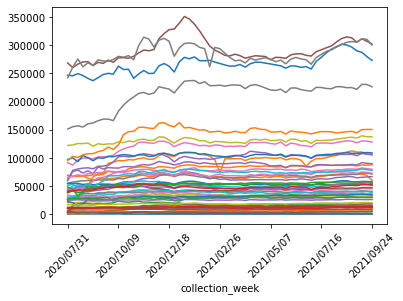

In [58]:
plotdf.plot(legend=False,rot=45)